In [63]:
##### Red Wine Quality #####
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 #

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('/home/ml-abu-saleh-ml/JUPYTER/DATASETS/winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [68]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


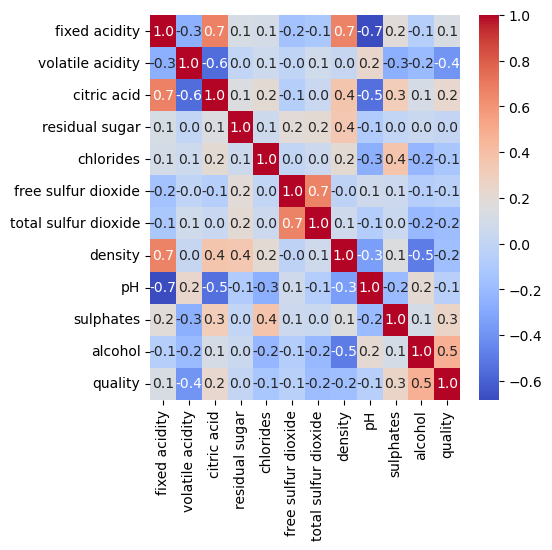

In [69]:
plt.figure(figsize=(5,5))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f",cmap='coolwarm')

plt.show()

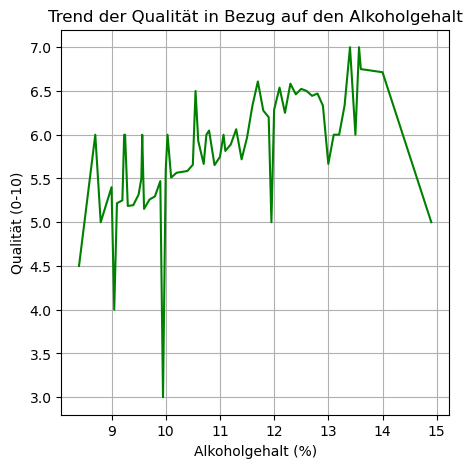

In [70]:
plt.figure(figsize=(5, 5))
sns.lineplot(x='alcohol', y='quality', data=df, errorbar=None, color='green')
plt.title('Trend der Qualität in Bezug auf den Alkoholgehalt')
plt.xlabel('Alkoholgehalt (%)')
plt.ylabel('Qualität (0-10)')
plt.grid(True)
plt.show()

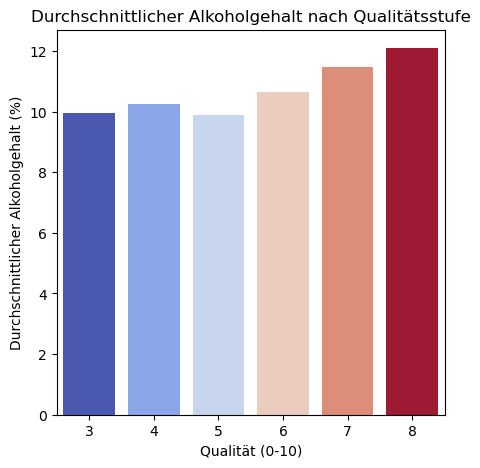

In [71]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='alcohol', data=df, palette='coolwarm', errorbar=None, hue ='quality', legend=False)
plt.title('Durchschnittlicher Alkoholgehalt nach Qualitätsstufe')
plt.xlabel('Qualität (0-10)')
plt.ylabel('Durchschnittlicher Alkoholgehalt (%)')
plt.show()

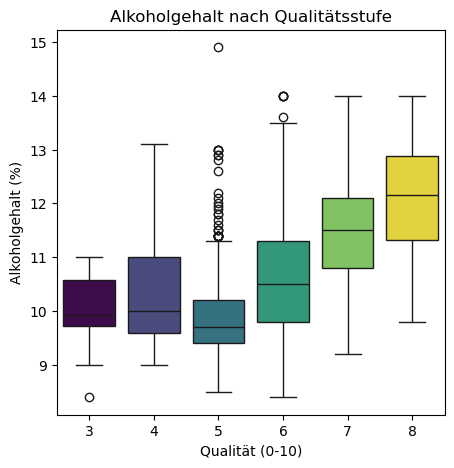

In [72]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis', hue = 'quality', legend=False)
plt.title('Alkoholgehalt nach Qualitätsstufe')
plt.xlabel('Qualität (0-10)')
plt.ylabel('Alkoholgehalt (%)')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [74]:
X = df.drop(columns='quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acs_score = accuracy_score(y_test, y_pred)

print("Accuracy score: " + str(acs_score))

Accuracy score: 0.66875


In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acs_score = accuracy_score(y_test, y_pred)

print("Accuracy score: " + str(acs_score))

Accuracy score: 0.565625


/home/ml-abu-saleh-ml/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=8)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acs_score = accuracy_score(y_test, y_pred)

print("Accuracy score: " + str(acs_score))

Accuracy score: 0.49375


In [78]:
from sklearn.svm import SVC

model = SVC(kernel='linear', decision_function_shape='ovr')  # or 'ovo'

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acs_score = accuracy_score(y_test, y_pred)

print("Accuracy score: " + str(acs_score))

Accuracy score: 0.56875


In [79]:
#do it to a binary classafictation !!
df['is_high_quality'] = (df['quality'] >= 6).astype(int)
df.drop(columns='quality', inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [80]:
X = df.drop(columns='is_high_quality')
y = df['is_high_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acs_score = accuracy_score(y_test, y_pred)

print("Accuracy score: " + str(acs_score))

Accuracy score: 0.775
